# <span style = "color:rgb(50,120,229)">Geometric Transformations</span>

## <font style="color:rgb(50,120,229)"> Overview</font>

In this module, we will cover the following topics.

1. **Affine Transform**
2. **Homography**

## <font style="color:rgb(50,120,229)"> Introduction</font>


An image can be warped or transformed in many different ways. The image below shows a few different kinds of image transformations.

![Image Transformations](https://www.dropbox.com/s/8fc343kafgmljx3/motion_models.png?dl=1)

A **translation** simply means moving the entire image in the x and y directions. 

A **Euclidean Transform** is just a fancy word for a transform that is a combination of **translation** and **rotation**.  Notice that a Euclidean transform preserves **orthogonality**; perpendicular lines in the original image are also perpendicular in the transformed image. 

An **Affine Transform** is a combination of **translation**, **rotation**, **scaling** in x and y directions,  and a parameter called **shear** because of which orthogonality is not preserved in the affine transform. **Parallel lines in the original image remain parallel** but lines that were perpendicular to each other are no longer at 90 degrees to each other in the transformed image.

A **Perspective Transform** or **Homography** maps a set of points in one image to another set of points in the second image. Thus, the output can take any shape. They only **preserve straight lines**.

# <font style = "color:rgb(50,120,229)">Affine Transform</font>

In OpenCV, an Affine transform is stored in a 2 x 3 sized matrix. The first two columns of this matrix encode rotation, scale and shear, and the last column encodes translation ( i.e. shift ).

$$A = \begin{bmatrix} a & b & t_x \\ c & d & t_y \end{bmatrix}$$

Given a point (x, y) in the original image, the above affine transform, moves it to point (${x_t}$, ${y_t}$) using the equation given below

$$
\begin{bmatrix} x_t \\ y_t \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix}
$$


Translation, Rotation and Euclidean transforms are special cases of the Affine transform. 

In Translation, the rotation and shear parameters are zero and scale is 1, the translation parameters are non-zero. 

In a Euclidean transform the rotation and translation parameters are non-zero, with scale 1 and shear 0. 

In OpenCV, if you want to apply an affine transform to the entire image you can use the function [**`warpAffine`**](https://docs.opencv.org/4.1.0/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983).

```cpp
void cv::warpAffine	(	InputArray 	src,
OutputArray 	dst,
InputArray 	M,
Size 	dsize,
int 	flags = INTER_LINEAR,
int 	borderMode = BORDER_CONSTANT,
const Scalar & 	borderValue = Scalar() 
)
```

**Parameters**

- **`src`**	input image.
- **`dst`**	output image that has the size dsize and the same type as src .
- **`M`**	2×3 transformation matrix.
- **`dsize`**	size of the output image.
- **`flags`**	combination of interpolation methods (see InterpolationFlags) and the optional flag WARP_INVERSE_MAP that means that M is the inverse transformation ( dst→src ).
- **`borderMode`**	pixel extrapolation method (see BorderTypes); when borderMode=BORDER_TRANSPARENT, it means that the pixels in the destination image corresponding to the "outliers" in the source image are not modified by the function.
- **`borderValue`**	value used in case of a constant border; by default, it is 0.

### <span style = "color:rgb(8,133,37)">Example</span>

Let's create a simple image to see different kinds of transformations. The image is of size 200x200. It has a black border and an square of size 100x100 in the center. 

In [1]:
// Standard imports
#include "includeLibraries.h"
#include <opencv2/opencv.hpp>
#include "matplotlibcpp.h"
#include "displayImages.h"
#include <cmath>

In [2]:
using namespace std;

In [3]:
using namespace cv;

In [4]:
using namespace matplotlibcpp;

In [5]:
// Create a black image of size 200x200
Mat img (200,200,CV_32FC3,Scalar(0,0,0));

In [6]:
// Create a blue square in the center
img(Range(50,150),Range(50,150)).setTo(Scalar(1,0.6,0.2));

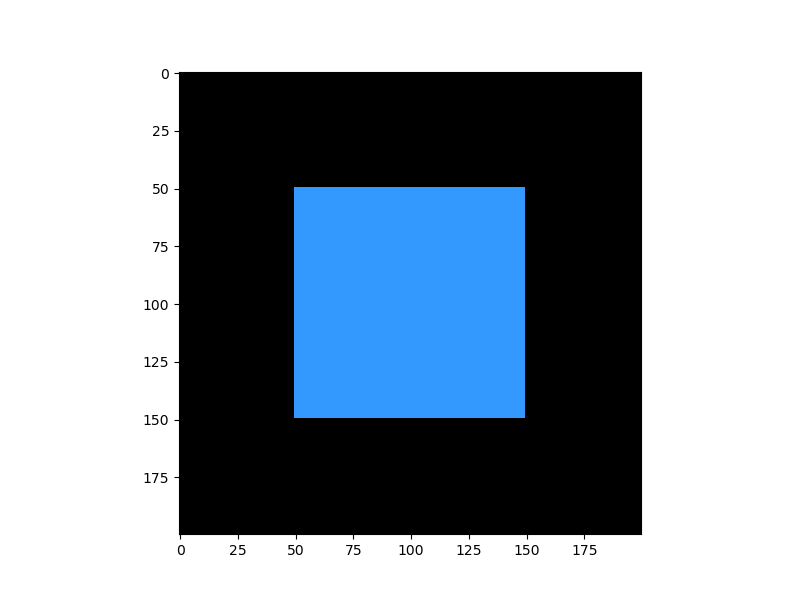

In [7]:
// Display image
plt::figure_size(800,600);
plt::imshow(img);
auto pltImg = displayImage(img);
pltImg

### <span style = "color:rgb(8,133,37)">Translate Image</span>

In [8]:
// Output dimension
Size outDim = img.size();

In [9]:
// Translate by 25,25
float warpMatValues[] = { 1.0, 0.0, 25.0, 0.0, 1.0, 25.0 };
Mat warpMat = Mat(2,3,CV_32F,warpMatValues);

In [10]:
// Warp Image
Mat result;
warpAffine(img, result, warpMat, outDim);

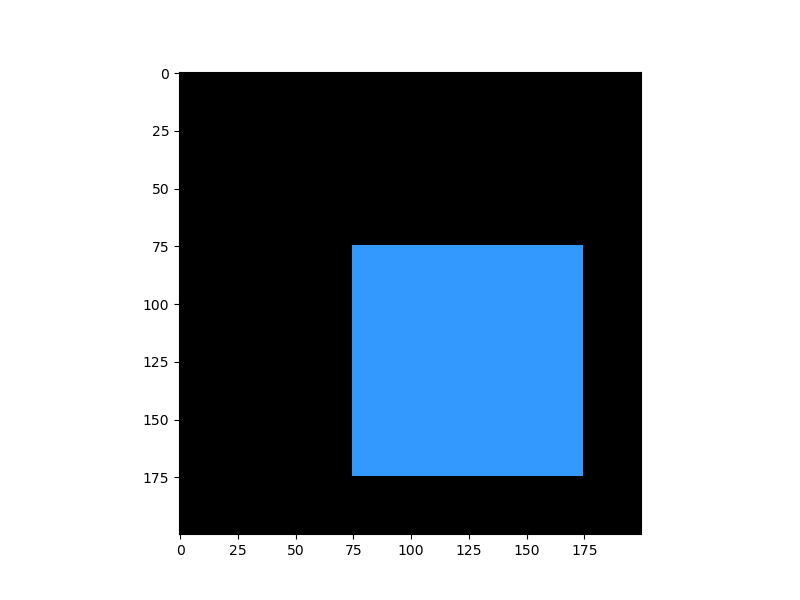

In [11]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

In [12]:
// Scale along x direction
float warpMatValues2[] = { 2.0, 0.0, 0.0, 0.0, 1.0, 0.0 };
warpMat = Mat(2,3,CV_32F,warpMatValues2);

// Warp image
warpAffine(img, result, warpMat, outDim);

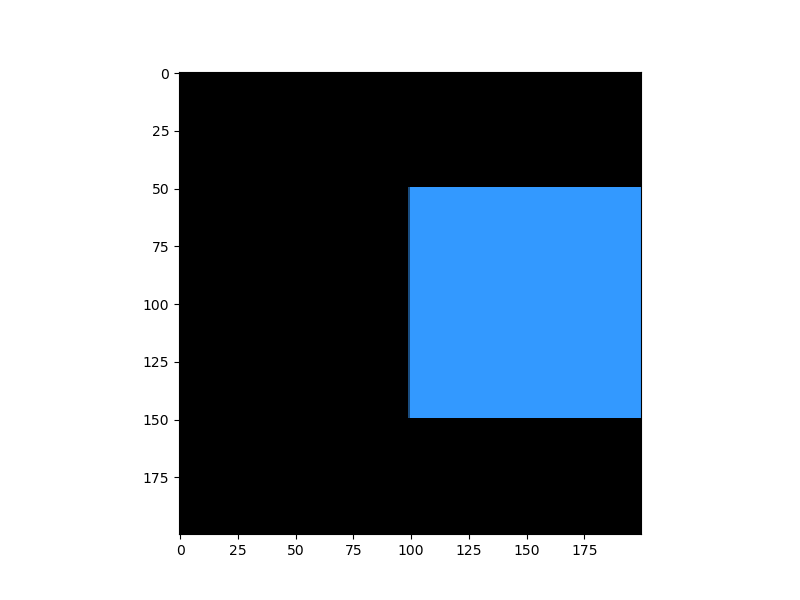

In [13]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Scale image width</span>

In [14]:
// Scale along x direction

// Warp image
warpAffine(img, result, warpMat, Size(outDim.width*2, outDim.height));

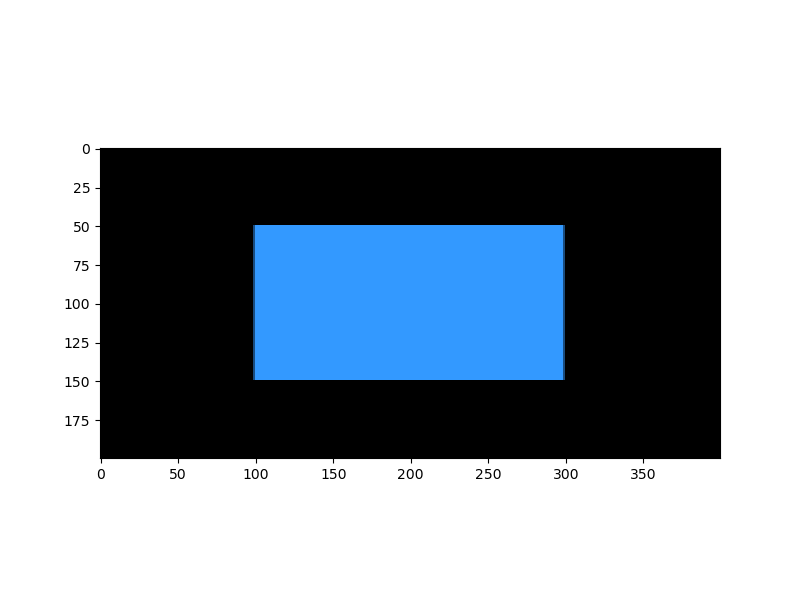

In [15]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Scale along both dimensions</span>

In [16]:
// Scale along x and y directions
float warpMatValues3[] = { 2.0, 0.0, 0.0, 0.0, 2.0, 0.0 };
warpMat = Mat(2,3,CV_32F,warpMatValues3);

// Warp image
warpAffine(img, result, warpMat, Size(outDim.width*2, outDim.height*2));

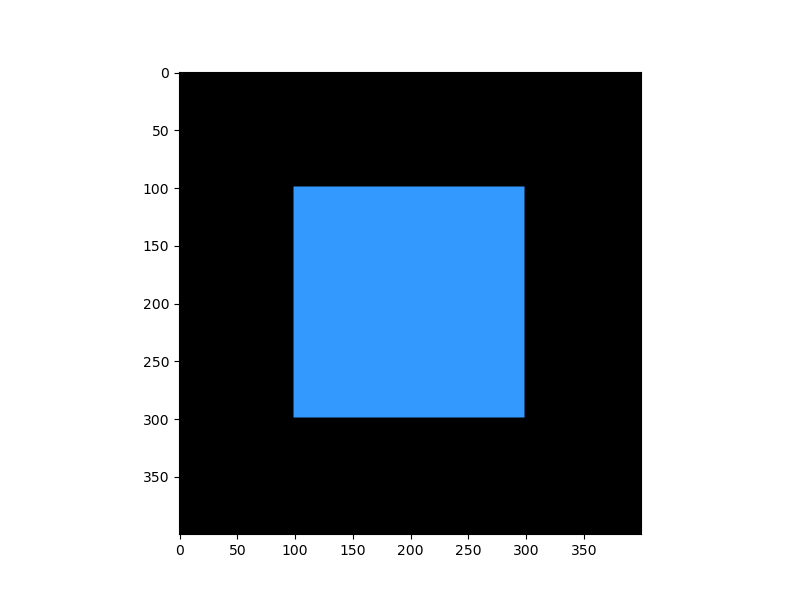

In [17]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Rotate Image about the origin (0,0)</span>

Let's say we want to rotate a point $(x, y)$ about the original by an angle $\theta$. The new point $(x', y')$ after rotation is given by 

$$
\begin{bmatrix} 
   x' \\ y' 
\end{bmatrix} = \begin{bmatrix} 
   \cos \theta & \sin \theta \\ 
  -\sin \theta & \cos \theta 
\end{bmatrix} \begin{bmatrix} 
   x \\ y
\end{bmatrix}
$$

You can read about it more at this link [Rotation Matrix](https://en.wikipedia.org/wiki/Rotation_matrix). You may notice a difference in sign between our matrix and that of Wikipedia. It is simply because of the difference in what is considered positive $\theta$ -- anti-clockwise vs. clockwise. 


The affine matrix is given by. 

$$
\begin{bmatrix} 
   \cos \theta & \sin \theta & 0 \\ 
  -\sin \theta & \cos \theta & 0 
\end{bmatrix}
$$

Notice, the first two columns form the rotation matrix, and the last column indicates zero translation.



In [18]:
// Rotate image
float angleInRadians = 30;
angleInRadians = 30 * 3.14 / 180.0;

float cosTheta = cos(angleInRadians);
float sinTheta = sin(angleInRadians);

// Rotation matrix 
// https://en.wikipedia.org/wiki/Rotation_matrix

float warpMatValues4[] = { cosTheta, sinTheta, 0.0, -sinTheta, cosTheta, 0.0 };
warpMat = Mat(2,3,CV_32F,warpMatValues4);

// Warp image
warpAffine(img, result, warpMat, outDim);

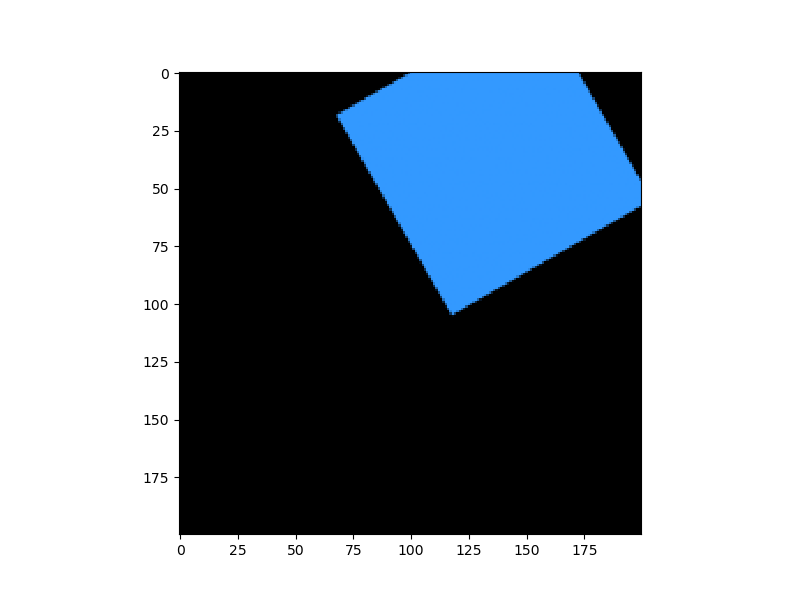

In [19]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Rotate image about a specific point (center)</span>

Let's say we want to rotate a point $(x, y)$ about a specific point $(x_c, y_c)$. This point is called the **center** of rotation. The affine matrix that does this is given by 

$$
\begin{bmatrix} 
   \cos \theta & \sin \theta &  x_c (1-\cos \theta)  - y_c \sin \theta   \\ 
  -\sin \theta &  \cos \theta & x_c \sin \theta + y_c ( 1 - \cos \theta)
\end{bmatrix}
$$

Here is a quick derivation for the above matrix. We can find the rotation about a specific center in three steps. 

1. Move the origin of the coordinate system to $(x_c, y_c)$. This can be done by subtracting $(x_c, y_c)$ from $(x, y)$.  
2. Use the rotation about the origin on the transformed point $(x - x_c, y - y_c)$
$$
\begin{bmatrix} 
   \cos \theta & \sin \theta\\ 
  -\sin \theta & \cos \theta
\end{bmatrix} \begin{bmatrix} 
   x - x_c\\ 
   y - y_c
\end{bmatrix}
$$
3. Add back the subtracted point $(x_c, y_c)$ 
$$
\begin{align}
\begin{bmatrix} 
   x'\\ 
   y' 
\end{bmatrix} &= \begin{bmatrix} 
   \cos \theta & \sin \theta\\ 
  -\sin \theta & \cos \theta
\end{bmatrix} \begin{bmatrix} 
   x - x_c\\ 
   y - y_c
\end{bmatrix} + \begin{bmatrix} 
   x_c\\ 
   y_c
\end{bmatrix} \\
&= \begin{bmatrix} 
   \cos \theta & \sin \theta\\ 
  -\sin \theta & \cos \theta
\end{bmatrix} \begin{bmatrix} 
   x\\ 
   y
\end{bmatrix} + \begin{bmatrix} 
   x_c (1-\cos \theta)  - y_c \sin \theta\\ 
   x_c \sin \theta + y_c ( 1 - \cos \theta)
\end{bmatrix}
\end{align}
$$

In [20]:
float centerX = img.size().width/2;
float centerY = img.size().height/2;

float tx = (1-cosTheta) * centerX - sinTheta * centerY;
float ty = sinTheta * centerX + (1-cosTheta) * centerY;

// Rotation matrix 
// https://en.wikipedia.org/wiki/Rotation_matrix

float warpMatValues5[] = { cosTheta, sinTheta, tx, -sinTheta, cosTheta, ty };
warpMat = Mat(2,3,CV_32F,warpMatValues5);

// Warp image
warpAffine(img, result, warpMat, outDim);

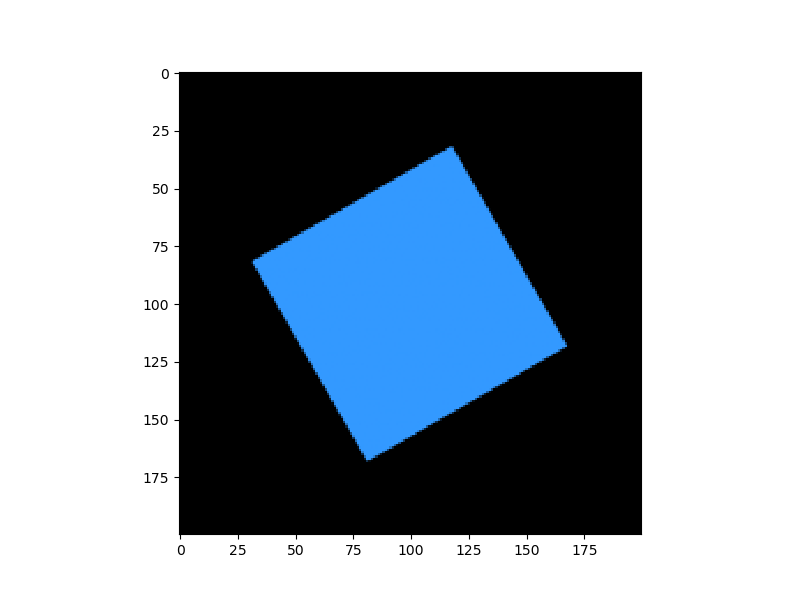

In [21]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Rotate image the easy way</span>

We can also use a built in function **getRotationMatrix2D** to rotate the image about any center. The syntax is given below. 

```python
rotMat	=	cv::getRotationMatrix2D(	center, angle, scale	)
```

**Parameters**
- **`center`** - Center of the rotation in the source image.
- **`angle`** - Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the -top-left corner).
- **`scale`** - Isotropic scale factor.

In [22]:
float anglesInDegrees = 30;
// Get rotation matrix
Mat rotationMatrix = getRotationMatrix2D(Point2f(centerX,centerY),anglesInDegrees, 1);

// Warp image
warpAffine(img, result, rotationMatrix, outDim);

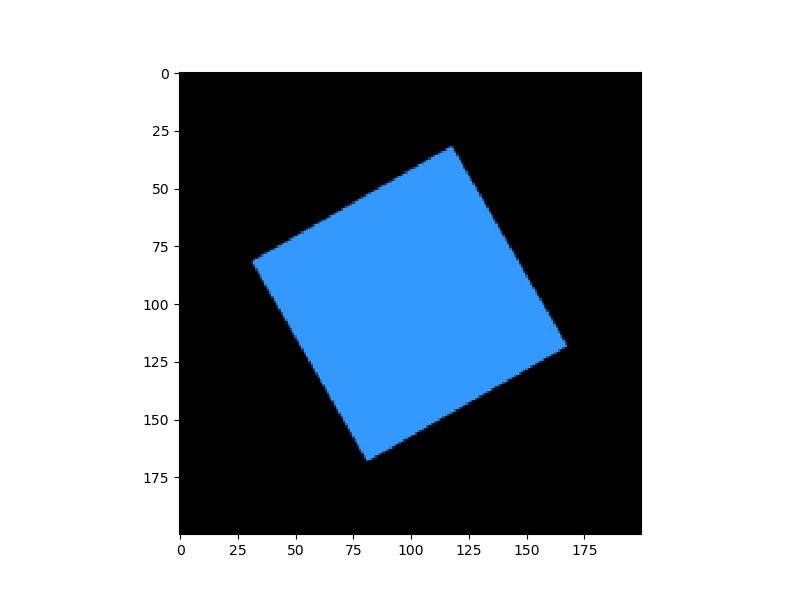

In [23]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Shear Transformation</span>

In [24]:
float shearAmount = 0.1;

float warpMatValues6[] = { 1, shearAmount, 0, 0, 1.0, 0 };
warpMat = Mat(2,3,CV_32F,warpMatValues6);

// Warp image
warpAffine(img, result, warpMat, outDim);

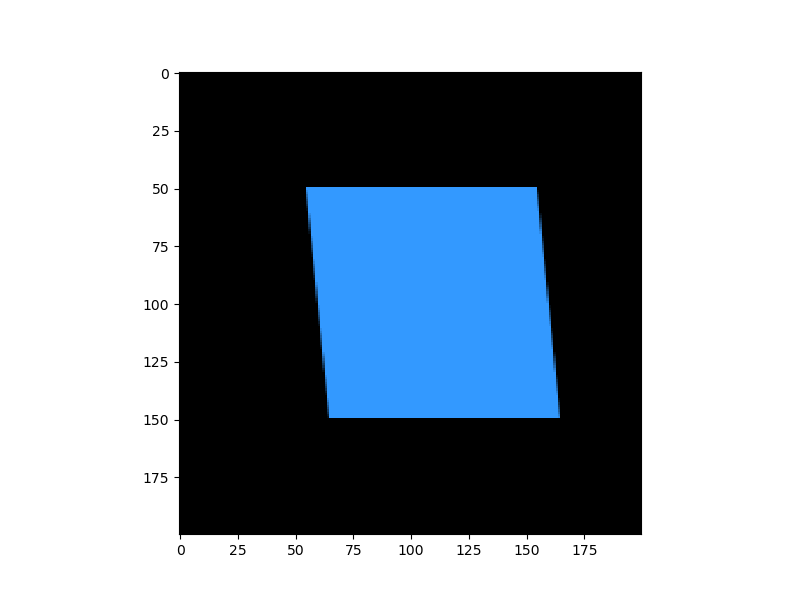

In [25]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Complex Transformations</span>

Now, let's say we want to perform multiple operations -- rotation, scale, shear, and translate. We can obviously the transforms one after the other, but a more efficient way is to do this in one shot. This can be done by multiplying the non-translation part of the the matrices, and adding the translation parts. 

Let's do a experiment where we first scale the image by 1.1, shear it by -0.1, rotate it by 10 degrees, and move in in the x direction by 10 pixels. 

In [26]:
// Scale
float scaleAmount = 1.1;
float warpMatValues7[] = { scaleAmount, 0.0, 0, scaleAmount};
Mat scaleMat = Mat(2,2,CV_32F,warpMatValues7);

// Shear
shearAmount = -0.1;
float warpMatValues8[] = { 1, shearAmount, 0, 1.0};
Mat shearMat = Mat(2,2,CV_32F,warpMatValues8);

// Rotate by 10 degrees about (0,0)
angleInRadians = 10.0 * 3.14 / 180.0;
cosTheta = cos(angleInRadians);
sinTheta = sin(angleInRadians);

float warpMatValues9[] = { cosTheta, sinTheta, -sinTheta, cosTheta};
Mat rotMat = Mat(2,2,CV_32F,warpMatValues9);

float warpMatValues10[] = {10,0};
Mat translateVector = Mat(2,1,CV_32F,warpMatValues10);

// First scale is applied, followed by shear, followed by rotation. 
Mat scaleShearRotate = rotMat * shearMat * scaleMat;

hconcat(scaleShearRotate,translateVector,warpMat);

In [27]:
cout << warpMat;

[1.0833055, 0.082586601, 10;
 -0.19091715, 1.1023972, 0]

In [28]:
float warpMatValues11[] = {50,50,50,149,149,50,149,149};

In [29]:
hconcat(translateVector,translateVector,translateVector);
hconcat(translateVector,translateVector,translateVector);
Mat outPts = scaleShearRotate * Mat(4,2,CV_32F,warpMatValues11).t() + translateVector;

In [30]:
cout << outPts;

[68.294601, 76.47068, 175.54184, 183.71793;
 45.574001, 154.71132, 26.673204, 135.81053]

In [31]:
// Warp image
warpAffine(img, result, warpMat, outDim);

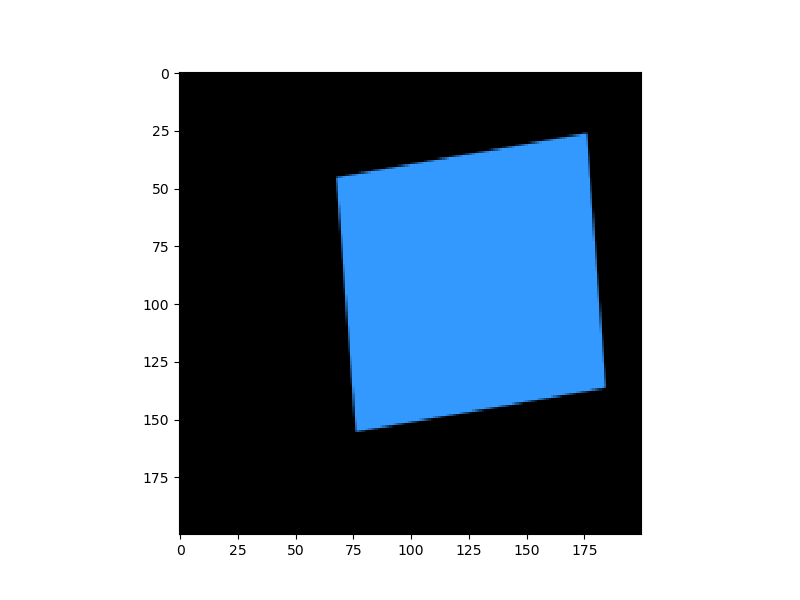

In [32]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Complex Transformations using 3-Point Correspondences</span>

You can see specifying the affine transform can become very cumbersome. Is there an easier way? 

Yes! 

We know that an affine transfrom that 6 degrees of freedom 
1. Two for translation (tx, ty)
2. Two for scale (sx, sy) 
3. One for shear
4. One for in-plane rotation 


This means that if two images are related by an affine transform and we know the location of at least 3 points ( i.e. 6 coordinates ) in the source image and the destination image, we can recover the affine transform between them.

Now, let us consider the coordinates of 3 corners of the original square. They are located at (50,50), (50, 149) and (149, 50). 

In the destination image above, the points are at (68, 45), (76,155), (176, 27) respectively. We can use the function 
**estimateAffine2D** to calculate the matrix. 

In [33]:
vector<Point2f> srcPoints {Point2f(50,50),Point2f(50,149),Point2f(149,50)};
vector<Point2f> dstPoints {Point2f(68,45),Point2f(76,155),Point2f(176,27)};

In [34]:
Mat estimatedMat = estimateAffine2D(srcPoints,dstPoints);

In [35]:
cout << "True warp matrix:\n\n" << warpMat;

True warp matrix:

[1.0833055, 0.082586601, 10;
 -0.19091715, 1.1023972, 0]

In [36]:
cout << "Estimated warp matrix:\n\n" << estimatedMat;

Estimated warp matrix:

[1.090909090909091, 0.0808080808080808, 9.414141414141413;
 -0.1818181818181818, 1.111111111111111, -1.464646464646465]

If we have more point correspondences, we can use all of them to get better results. Here is an example of using all four points on the square.


In [37]:
srcPoints = vector<Point2f> {Point2f(50,50),Point2f(50,149),Point2f(149,149),Point2f(149,50)};
dstPoints = vector<Point2f> {Point2f(68,45),Point2f(76,155),Point2f(183,135),Point2f(176,27)};

In [38]:
estimatedMat = estimateAffine2D(srcPoints,dstPoints);

In [39]:
cout << "True warp matrix:\n\n" << warpMat;

True warp matrix:

[1.0833055, 0.082586601, 10;
 -0.19091715, 1.1023972, 0]

In [40]:
cout << "Estimated warp matrix:\n\n" << estimatedMat;

Estimated warp matrix:

[1.085858585858586, 0.07575757575757572, 10.16919191919193;
 -0.1919191919191919, 1.101010101010101, 0.04545454545452077]

Just for fun, let us visually inspect by warping the original image using this transform we have obtained. It looks indistinguishable from the image we had obtained using explicit matrix multiplication. 

In [41]:
// Warp image
warpAffine(img, result, estimatedMat, outDim);

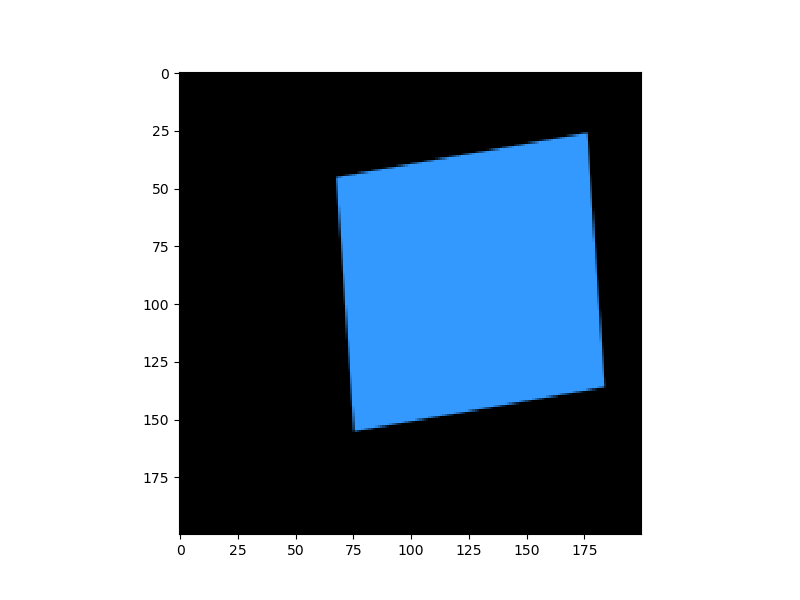

In [42]:
// Display image
plt::figure_size(800,600);
plt::imshow(result);
pltImg = displayImage(result);
pltImg

### <span style = "color:rgb(8,133,37)">Limitations of Affine Transform</span>

Let's consider a transformation in which a square transforms to a trapezium. The original image, and the new transformed image are shown below. 

In [43]:
// Transformed image
Mat imgT (200,200,CV_32FC3,Scalar(0,0,0));

In [44]:
Point dstPoints2[] = {Point(75,50),Point(50,149),Point(149,149),Point(124,50)};

In [45]:
fillConvexPoly(imgT,dstPoints2,4,Scalar(1.0,0.6,0.2),LINE_AA);

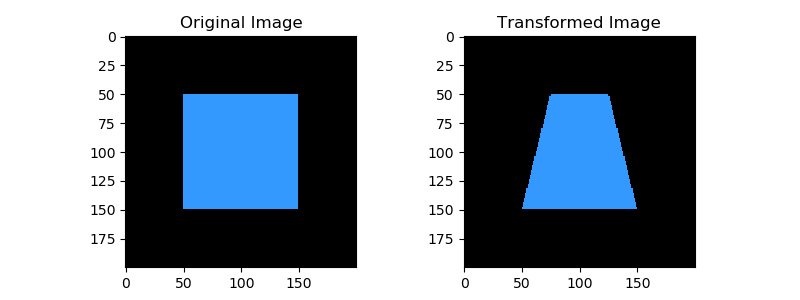

In [47]:
plt::figure_size(800,300);
plt::subplot(1,2,1);
plt::imshow(img);
plt::title("Original Image");
pltImg = displayImage(img);
plt::subplot(1,2,2);
plt::imshow(imgT);
plt::title("Transformed Image");
pltImg = displayImage(imgT);
pltImg

By construction, we know the four original corners are transformed to (75, 50), (50, 149), (149, 149) and (124, 50). We know an affine transform cannot map a square to a trapezium, but let our theoretical knowledge not stop us from estimating the best affine transform we can estimate, and warp the original image based on the estimated affine transform. 

In [49]:
dstPoints = vector<Point2f>{Point2f(75,50),Point2f(50,149),Point2f(149,149),Point2f(124,50)};
estimatedMat = estimateAffine2D(srcPoints,dstPoints);

In [50]:
cout << "Estimated warp matrix:\n\n" << estimatedMat;

Estimated warp matrix:

[0.494949494949495, -0.2525252525252525, 62.87878787878788;
 0, 1, 0]

In [53]:
// Warp image
Mat imA;
warpAffine(img, imA, estimatedMat, outDim);

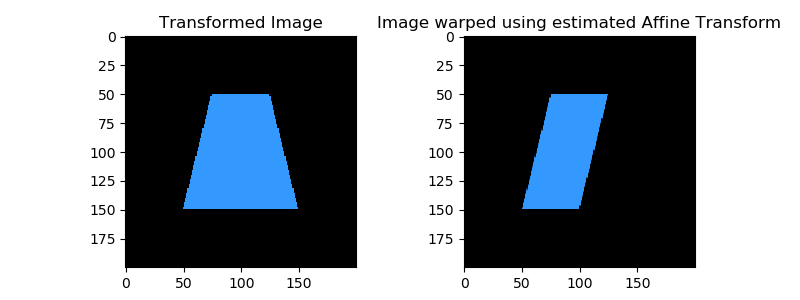

In [54]:
plt::figure_size(800,300);
plt::subplot(1,2,1);
plt::imshow(imgT);
plt::title("Transformed Image");
pltImg = displayImage(imgT);
plt::subplot(1,2,2);
plt::imshow(imA);
plt::title("Image warped using estimated Affine Transform");
pltImg = displayImage(imA);
pltImg

As you can see the estimated affine transform does a terrible job. 

To match a square to an arbitrary quad, we need a transform called **Homography**. While we are on this example, let us quickly see if how well we can do with homography. 

In the code below, **findHomography** is used to find the Homography given a set of 4 corresponding points, and **warpPerspective** is used to warp the image based on the calculated Homography. 

In [55]:
Mat h = findHomography(srcPoints,dstPoints);
cout << h;

[0.3943581822616054, -0.404438663523291, 60.26136086497032;
 6.030477984098626e-16, 0.1911226729534181, 30.28209088691974;
 6.458800613804299e-18, -0.004064710186163729, 1]

In [56]:
// Warp source image to destination based on homography
Mat imH;
warpPerspective(img, imH, h, outDim);

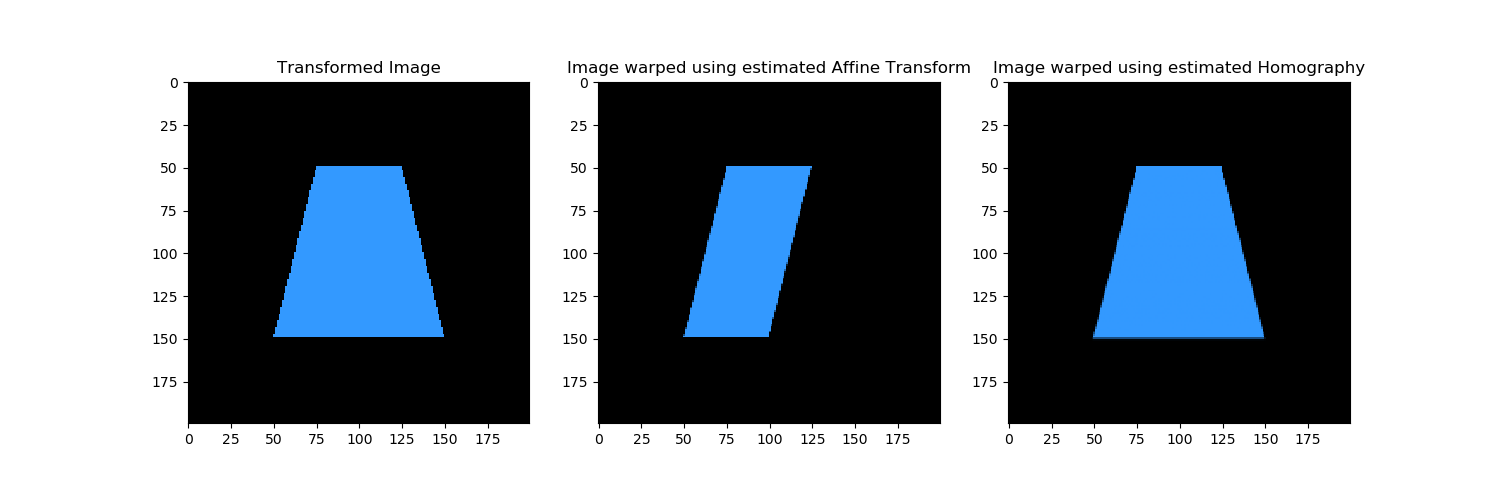

In [62]:
plt::figure_size(1500,500);
plt::subplot(1,3,1);
plt::imshow(imgT);
plt::title("Transformed Image");
pltImg = displayImage(imgT);
plt::subplot(1,3,2);
plt::imshow(imA);
plt::title("Image warped using estimated Affine Transform");
pltImg = displayImage(imA);
plt::subplot(1,3,3);
plt::imshow(imH);
plt::title("Image warped using estimated Homography");
pltImg = displayImage(imH);
pltImg

## <font style = "color:rgb(50,120,229)">What is Homography ?</font>

Consider two images of a plane (top of the book) shown in Figure below. The red dot represents the same physical point in the two images. In computer vision jargon we call these corresponding points. The figure shows four corresponding points in four different colors — red, green, yellow and orange. 

![Homography Example Annotated](https://www.learnopencv.com/wp-content/uploads/2016/01/homography-example-768x511.jpg)

A **Homography** is a transformation ( a 3×3 matrix ) that maps the points in one image to the corresponding points in the other image.

Now since a homography is a 3×3 matrix we can write it as

$$
H = \begin{bmatrix}h_{00} & h_{01} & h_{02}\\h_{10} & h_{11} & h_{12}\\h_{20} & h_{21} & h_{22}\end{bmatrix}
$$

Let us consider the first set of corresponding points — $(x_1, y_1)$ in the first image and $(x_2, y_2)$ in the second image. Then, the Homography H maps them in the following way
$$
\begin{bmatrix}x_1 \\ y_1 \\ 1\end{bmatrix} = H\begin{bmatrix}x_2 \\ y_2 \\ 1\end{bmatrix} = \begin{bmatrix}h_{00} & h_{01} & h_{02}\\h_{10} & h_{11} & h_{12}\\h_{20} & h_{21} & h_{22}\end{bmatrix}\begin{bmatrix}x_2 \\ y_2 \\ 1\end{bmatrix}
$$

## <font style = "color:rgb(50,120,229)">Image Alignment Using Homography</font>

The above equation is true for **all sets of corresponding points as long as they lie on the same plane** in the real world. In other words you can apply the homography to the first image and the book in the first image will get aligned with the book in the second image!


![Aligned Image](https://www.learnopencv.com/wp-content/uploads/2016/01/homography-alignment-768x511.jpg)


But what about points that are not on the plane? Well, they will NOT be aligned by a homography as you can see in the figure above. But wait, what if there are two planes in the image ? Well, then you have two homographies — one for each plane.

## <font style = "color:rgb(50,120,229)">How to calculate a Homography ?</font>

To calculate a homography between two images, you need to know at least 4 point correspondences between the two images. If you have more than 4 corresponding points, it is even better. OpenCV will robustly estimate a homography that best fits all corresponding points. Usually, these point correspondences are found automatically by matching features like SIFT or SURF between the images, but in this section we are simply going to click the points by hand.

Let’s look at the usage first.


### <font style = "color:rgb(8,133,37)">Function Syntax</span>

**`pts_src`** and **`pts_dst`** are numpy arrays of points in source and destination images. We need at least 4 corresponding points.

```cpp
Mat findHomography(InputArray pts_src, InputArray pts_dst, int method=0, double ransacReprojThreshold=3, OutputArray mask=noArray() )
```

The calculated homography can be used to warp the source image to destination. Size is the size (width,height) of **`im_dst`**.

```cpp
void warpPerspective(InputArray im_src, OutputArray im_dst, InputArray M, Size dsize, int flags=INTER_LINEAR, int borderMode=BORDER_CONSTANT, const Scalar& borderValue=Scalar())
```
Let us look at a more complete example in C++.

### <span style="color:rgb(8,133,37)">Homography Example</span>

The code below shows how to take four corresponding points in two images and warp image onto the other. We specify the four corners of the book in source and destination image. Then use the findHmography function to find the matrix that relates the two set of points. Finally we apply this matrix on the source image using the warpPerspective function to get the final output.

In [63]:
// Read source image.
Mat im_src = imread(DATA_PATH+"images/book2.jpg");
// Four corners of the book in source image
vector<Point2f> pts_src {Point2f(141, 131), Point2f(480, 159), Point2f(493, 630),Point2f(64, 601)};

// Read destination image.
Mat im_dst = imread(DATA_PATH+"images/book1.jpg");
// Four corners of the book in destination image.
vector<Point2f> pts_dst {Point2f(318, 256), Point2f(534, 372),Point2f(316, 670),Point2f(73, 473)};

// Calculate Homography
h = findHomography(pts_src, pts_dst);

// Warp source image to destination based on homography
Mat im_out;
warpPerspective(im_src, im_out, h, im_dst.size());

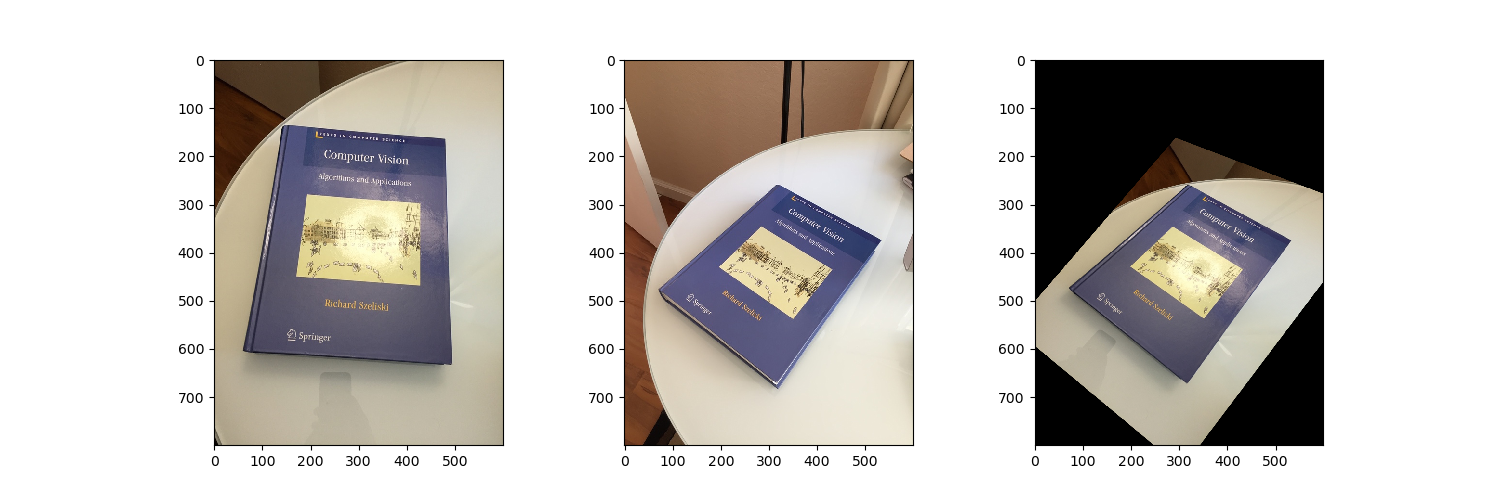

In [64]:
plt::figure_size(1500,500);
plt::subplot(1,3,1);
plt::imshow(im_src);
pltImg = displayImage(im_src);
plt::subplot(1,3,2);
plt::imshow(im_dst);
pltImg = displayImage(im_dst);
plt::subplot(1,3,3);
plt::imshow(im_out);
pltImg = displayImage(im_out);
pltImg

# <font style = "color:rgb(50,120,229)">Applications of Homography</font>

The most interesting application of Homography is undoubtedly making panoramas ( a.k.a image mosaicing and image stitching ). Since the implementation is a bit involved, let us see some other interesting applications.

## <font style = "color:rgb(50,120,229)">1. Panorama : An Application of Homography</font>

In the previous section, we learned that if a homography between two images is known, we can warp one image onto the other. However, there was one big caveat. The images had to contain a plane ( the top of a book ), and only the planar part was aligned properly. It turns out that if you take a picture of any scene ( not just a plane ) and then take a second picture by rotating the camera, the two images are related by a homography! In other words you can mount your camera on a tripod and take a picture. Next, pan it about the vertical axis and take another picture. The two images you just took of a completely arbitrary 3D scene are related by a homography. The two images will share some common regions that can be aligned and stitched and bingo you have a panorama of two images. Is it really that easy ? Nope! (sorry to disappoint) A lot more goes into creating a good panorama, but the basic principle is to align using a homography and stitch intelligently so that you do not see the seams. Creating panoramas will be covered in a later chapter.

## <font style = "color:rgb(50,120,229)">2. Perspective Correction using Homography</font>

Let’s say you have a photo shown below. 

![Original Image](https://www.dropbox.com/s/1bj8uq9km20megz/book2.jpg?dl=1)

Wouldn’t it be cool if you could click on the four corners of the book and quickly get an image that looks like the one shown below.

![Perspective Correction](https://www.learnopencv.com/wp-content/uploads/2016/01/perspective-correction.jpg)

Here are the steps.

1. Write a user interface to collect four corners of the book. Let’s call these points **`pts_src`**.
2. We need to know the aspect ratio of the book. For this book, the aspect ratio ( width / height ) is 3/4. So we can choose the output image size to be 300×400, and our destination points ( **`pts_dst`** ) to be (0,0), (299,0), (299,399) and (0,399)
3. Obtain the homography using **`pts_src`** and **`pts_dst`** .
4. Apply the homography to the source image to obtain the image shown above.

## <font style = "color:rgb(50,120,229)">3. Virtual Billboard</font>

In many televised sports events, advertisement in virtually inserted in live video feed. E.g. in soccer and baseball the ads placed on small advertisement boards right outside the boundary of the field can be virtually changed. Instead of displaying the same ad to everybody, advertisers can choose which ads to show based on the person’s demographics, location etc. In these applications the four corners of the advertisement board are detected in the video which serve as the destination points. The four corners of the ad serve as the source points. A homography is calculated based on these four corresponding points and it is used to warp the ad into the video frame.

Let's use the following image as the source image.

![Source Image](https://www.learnopencv.com/wp-content/uploads/2016/01/first-image.jpg)

The following image shows the Times Square.

![Times Square](https://www.learnopencv.com/wp-content/uploads/2016/01/times-square-768x512.jpg)

We can replace one of the billboards on The Times Square with the image of our choice. Here are the steps.

1. Write a user interface to collect the four corners of the billboard in the image. Let’s call these points **`pts_dst`**.
2. Let the size of the image you want to put on the virtual billboard be w x h. The corners of the image ( **`pts_src`** ) are therefore to be (0,0), (w-1,0), (w-1,h-1) and (0,h-1)
3. Obtain the homography using **`pts_src`** and **`pts_dst`** .
4. Apply the homography to the source image and blend it with the destination image to obtain the image shown below,

![Virtual Billboard with one billboard replaced with an image of our choice](https://www.learnopencv.com/wp-content/uploads/2016/01/virtual-billboard-768x512.jpg)


<br />

Can you identify which billboard got replaced?

**We have provided the code in the folder shared with you this week. But before checking that, try it yourself.**